<a href="https://colab.research.google.com/github/wksiazak/Linear-Regression-house_prices/blob/master/Linear_Regression_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@author Devs-Mentoring.pl

All rights reserved

Wszystkiego optymalnego!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

import numpy as np

pd.set_option('display.max_columns', None)


In [ ]:
house  = pd.read_csv("kc_house_data.csv")

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's create model which will predict apartment prices based on another features.  

In [ ]:
house_copy = house.copy()
house_copy['date'] = pd.to_datetime(house_copy['date'] )

# converting type of data from object to int -> to be able to build model
house_copy['year'] = house_copy['date'].dt.year
house_copy['month'] = house_copy['date'].dt.month
house_copy['day'] = house_copy['date'].dt.day

y = house_copy['price']
X = house_copy.drop(['price','date'], axis =1)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
# spliting data on train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print('X shape in total:', X.shape)
print('Train shape: ', X_train.shape)
print('Test shape: ',X_test.shape)

X shape in total: (21613, 22)
Train shape:  (17290, 22)
Test shape:  (4323, 22)


##Linear Regression

In [ ]:
# building model in training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#  calculating predictions based on trained model
y_pred_test = model.predict(X_test)

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
# Let's check determination score based on test data
r2_score(y_test, y_pred_test)

0.6933203602489433

In [ ]:
# Let's check determination score based on train data
r2_score(y_train, y_pred_train)

0.7030569450235711

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_test)

0.2623860145708981

In [ ]:
mean_absolute_percentage_error(y_train, y_pred_train)

0.255754029799361

Determination score close to 70% and MAPE around 25% are just not the best scores for Linear Regression model.
Let's try to use **regularizations** to improve scores.

##L1 - Lasso regularization

In [ ]:
lasso_model = Lasso(alpha=0.9)
lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.192e+14, tolerance: 2.370e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.9)

In [ ]:
y_lasso = lasso_model.predict(X_test)

In [ ]:
r2_score(y_test, y_lasso)

0.6933185542706237

In [ ]:
mean_absolute_percentage_error(y_test, y_lasso)

0.2623823874079914

Lasso have not improved scores in significant way.

##L2 - Ridge regularization

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.0067e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [ ]:
y_ridge = ridge_model.predict(X_test)

In [ ]:
r2_score(y_test, y_ridge)

0.6932664590297477

In [ ]:
mean_absolute_percentage_error(y_test, y_ridge)

0.26232092110896477

The same using Ridge -> still receiving scores on the same level as without regularization

Let's check importance of particular features in Linear Regression model using Ridge regularization

Feature: 0, Score: -0.00000
Feature: 1, Score: -37474.66672
Feature: 2, Score: 39014.41077
Feature: 3, Score: 117.13420
Feature: 4, Score: 0.08262
Feature: 5, Score: 8570.60499
Feature: 6, Score: 564983.95173
Feature: 7, Score: 52913.84527
Feature: 8, Score: 26834.38913
Feature: 9, Score: 96419.50738
Feature: 10, Score: 72.82933
Feature: 11, Score: 44.30239
Feature: 12, Score: -2649.64379
Feature: 13, Score: 22.69037
Feature: 14, Score: -560.86529
Feature: 15, Score: 599112.59148
Feature: 16, Score: -202947.50980
Feature: 17, Score: 14.96940
Feature: 18, Score: -0.37300
Feature: 19, Score: 36727.72501
Feature: 20, Score: 1352.92554
Feature: 21, Score: -239.94359


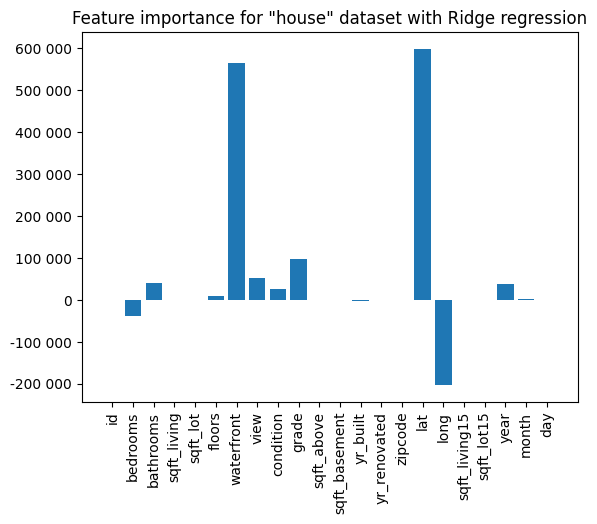

In [ ]:
# get importance
importance = ridge_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(X_train.columns, importance)
plt.xticks(rotation=90)
plt.title('Feature importance for "house" dataset with Ridge regression' )
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', ' '))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

## Feature engineering

After analyzing feature importance we can notice that some features do not have impact on the linear regression model like: id, sqft_basement.

Let's do some **feature engineering** to prepare "better" data for modeling.

In [ ]:
missing_values_count = house.isnull().sum() #checking if we have some empty entries

In [ ]:
print(missing_values_count)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Our dataset includes information about year of renevation, year of built and year of posting the offer.

Let's create column "house_old_in_year" which will calculate difference between "date" of posting the offer and year of building


In [ ]:
house_copy['house_old_in_year'] = house_copy['year'] - house_copy['yr_built']


Let's examine main statistisc in data set

In [ ]:
house_copy.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,house_old_in_year
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197,43.317818
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000,-1.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000,18.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000,40.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000,63.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000,115.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063,29.375493


Based on above we see that:


*   we need to check number of beddrooms where it is 33
*   in house_old_in_year we also need to check min value which is minus 1



In [ ]:
house_copy['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [ ]:
house_copy[house_copy['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,house_old_in_year
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014,6,25,67


In [ ]:
#Let's remove this "outlier" to prepare better model for modeling.

rows_to_drop = house_copy[house_copy['bedrooms']==33].index
house_copy.drop(rows_to_drop, inplace=True)
house_copy.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Price distribution in house data set')

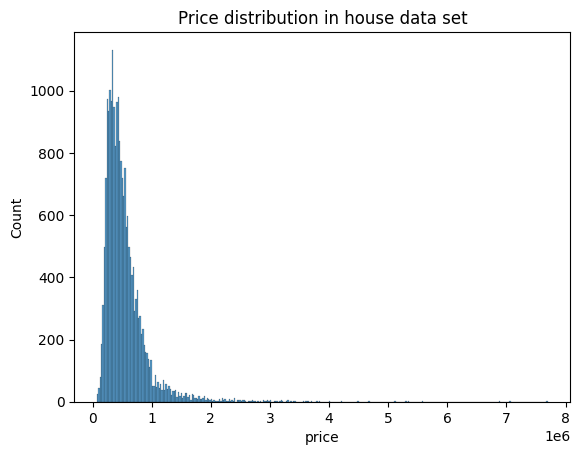

In [ ]:
sns.histplot(x = 'price', data = house_copy)
plt.title("Price distribution in house data set")

Let's see details for price range 200-800 k

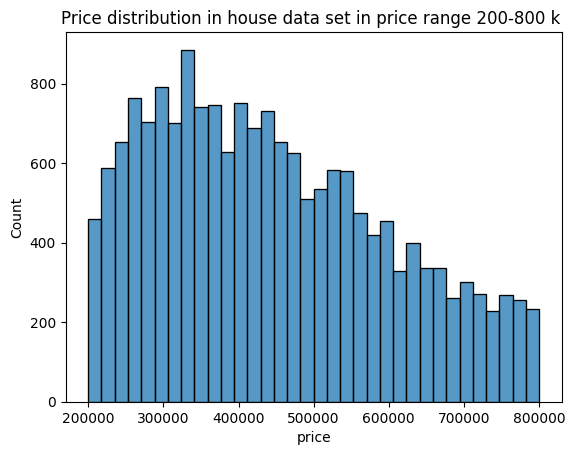

In [ ]:
filtered_house_copy = house_copy[(house_copy['price'] >= 200000) & (house_copy['price'] <= 800000)] #zmien wartość od dwócch milionow, spróbowac zrobić drugi model dla danych przetransformowanych
sns.histplot(x='price', data=filtered_house_copy)
plt.title("Price distribution in house data set in price range 200-800 k ")
plt.show()


We do not see any specific outliers in house prices so let's keep all for further analysis.

In [ ]:
house_copy[house_copy['house_old_in_year']==-1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,house_old_in_year
1763,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,3,10,2860,710,2015,0,98040,47.5784,-122.226,2230,10000,2014,6,25,-1
2687,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,3,6,710,0,2015,0,98144,47.5756,-122.316,1440,4800,2014,10,29,-1
7526,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,3,8,2730,0,2015,0,98072,47.7685,-122.160,2520,6126,2014,12,31,-1
8039,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,3,8,1000,200,2015,0,98144,47.6001,-122.298,1320,1852,2014,6,24,-1
14489,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,3,9,1280,290,2015,0,98199,47.6514,-122.385,1570,6000,2014,8,26,-1
17097,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,3,8,1380,0,2015,0,98122,47.6074,-122.305,1480,3600,2014,6,17,-1
19804,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0,0,3,9,1320,0,2015,0,98122,47.6047,-122.305,1380,1495,2014,8,1,-1
20769,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0,0,3,8,2990,0,2015,0,98133,47.7384,-122.348,1970,18110,2014,8,28,-1
20851,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0,0,3,9,2760,970,2015,0,98103,47.6725,-122.330,1800,4560,2014,7,9,-1
20962,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0,0,3,9,900,140,2015,0,98144,47.5951,-122.301,1350,3000,2014,7,31,-1


Those (-1) values should be replaced by 0, because it looks like in those cases houses were build in the same time when it was measured

In [ ]:
house_copy.loc[house_copy['house_old_in_year'] == -1, 'house_old_in_year'] = 0

In this phase we may for sure exclude for furter analysis columns: id, month, day, date.

In [ ]:
house_copy = house_copy.drop(['id','month', 'day' , 'date'], axis = 1)

In [ ]:
house_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21612 non-null  float64
 1   bedrooms           21612 non-null  int64  
 2   bathrooms          21612 non-null  float64
 3   sqft_living        21612 non-null  int64  
 4   sqft_lot           21612 non-null  int64  
 5   floors             21612 non-null  float64
 6   waterfront         21612 non-null  int64  
 7   view               21612 non-null  int64  
 8   condition          21612 non-null  int64  
 9   grade              21612 non-null  int64  
 10  sqft_above         21612 non-null  int64  
 11  sqft_basement      21612 non-null  int64  
 12  yr_built           21612 non-null  int64  
 13  yr_renovated       21612 non-null  int64  
 14  zipcode            21612 non-null  int64  
 15  lat                21612 non-null  float64
 16  long               216

Let's check now if model will provide better results

In [ ]:
y_2 = house_copy['price']
X_2 = house_copy.drop(['price'], axis =1)

In [ ]:
# spliting data on train and test data sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2)

In [ ]:
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)

LinearRegression()

In [ ]:
# wyliczanie wartości y dla zbioru testowego wykorzystując parametry utworzonej funkcji liniowej
y_pred_test_2 = model_2.predict(X_test_2)

In [ ]:
# obliczanie współczynnika determinacji na danych testowych
r2_score(y_test_2, y_pred_test_2)

0.7174064235826303

We see that "some" feature engineering improved our linear regression model by 2% (previously we had 68%, now ~71%)

Let's add lasso and ridge regularization.  

In [ ]:
lasso_model_2 = Lasso(alpha=0.9)   # spróbuj zrobić na większych alfa
lasso_model_2.fit(X_train_2, y_train_2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.512e+14, tolerance: 2.323e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.9)

In [ ]:
y_lasso_2 = lasso_model_2.predict(X_test_2)

In [ ]:
r2_score(y_test_2, y_lasso_2)

0.7173610972524174

Lasso regularization is not improving significantly this model. Let's check Ridge:

In [ ]:
ridge_model_2 = Ridge(alpha=1.0)
ridge_model_2.fit(X_train_2, y_train_2)

Ridge()

In [ ]:
y_ridge_2 = ridge_model_2.predict(X_test_2)

In [ ]:
r2_score(y_test_2, y_ridge_2)

0.7173420270390599

Ridge regularization is giving similar results.So let's try data in **polynomial regression** and **Decision Tree** model.

##Polynomial regression

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_2)

In [ ]:
poly_model = LinearRegression()

In [ ]:
X_train_poly = poly.fit_transform(X_train_2)  # here I am using data set after feature enginnering
X_test_poly = poly.transform(X_test_2)

In [ ]:
poly_model.fit(X_train_poly, y_train_2)

LinearRegression()

In [ ]:
y_pred_poly = poly_model.predict(X_test_poly)

In [ ]:
r2_score(y_test_2, y_pred_poly)

0.4642848050964602

Determination Score in polynomial regression is lower than in linear regression model with reguarization.

##Decision Tree
Let's check decision tree on data after removing feature engineering.  

In [ ]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X_2,y_2)

DecisionTreeRegressor()

In [ ]:
# predykcja wartości
y_pred_tree = model_tree.predict(X_2)

In [ ]:
r2_score(y_2,y_pred_tree)

0.9998855445255308

In [ ]:
model_tree.get_depth()

35

In Decision Tree Model we received very high determination score, but it is rather **overfitting **. Therefore let's try to get appriopiate depth level.

Let's try to select apropiate depth for our decision tree model thanks to cross validation, we will try for depth

In [ ]:
max_depth_values = [7,10,17,25]

In [ ]:
mean_scores = []
std_scores = []
for max_depth in max_depth_values:
    model = DecisionTreeRegressor(max_depth=max_depth)
    scores = cross_val_score(model, X_2, y_2, cv=5) # cross validation on whole data set, with no split
    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

In [ ]:
# Wybierz optymalną głębokość drzewa na podstawie wyników walidacji krzyżowej
optimal_depth_index = np.argmax(mean_scores)
optimal_depth = max_depth_values[optimal_depth_index]

In [ ]:
# Wydrukuj wyniki
print("Wyniki walidacji krzyżowej dla różnych głębokości drzewa:")
for i, depth in enumerate(max_depth_values):
    print(f"Depth {depth}: Average = {mean_scores[i]}, Standard Deviation = {std_scores[i]}")

print(f"\nOptimal depth of tree in model: {optimal_depth}")

Wyniki walidacji krzyżowej dla różnych głębokości drzewa:
Głębokość 7: Średnia wyników = 0.7621489881496621, Odchylenie standardowe wyników = 0.023598877585109142
Głębokość 10: Średnia wyników = 0.774801902648725, Odchylenie standardowe wyników = 0.02313029223741144
Głębokość 17: Średnia wyników = 0.7543012263777772, Odchylenie standardowe wyników = 0.029739129176238083
Głębokość 25: Średnia wyników = 0.7448052825982552, Odchylenie standardowe wyników = 0.030269237949811068

Optymalna głębokość drzewa: 10


In [ ]:
# bulding model based on optimal depth
model_depth_10 = DecisionTreeRegressor(max_depth=10)
model_depth_10.fit(X_2,y_2)

DecisionTreeRegressor(max_depth=10)

In [ ]:
y_pred_tree_10 = model_depth_10.predict(X_2)

In [ ]:
r2_score(y_2,y_pred_tree_10)

0.9082900664450465

Feature: 0, Score: 0.00036
Feature: 1, Score: 0.00047
Feature: 2, Score: 0.27041
Feature: 3, Score: 0.01376
Feature: 4, Score: 0.00022
Feature: 5, Score: 0.03645
Feature: 6, Score: 0.00560
Feature: 7, Score: 0.00073
Feature: 8, Score: 0.36809
Feature: 9, Score: 0.02247
Feature: 10, Score: 0.00223
Feature: 11, Score: 0.00197
Feature: 12, Score: 0.00024
Feature: 13, Score: 0.00967
Feature: 14, Score: 0.16540
Feature: 15, Score: 0.06008
Feature: 16, Score: 0.02145
Feature: 17, Score: 0.00975
Feature: 18, Score: 0.00034
Feature: 19, Score: 0.01031


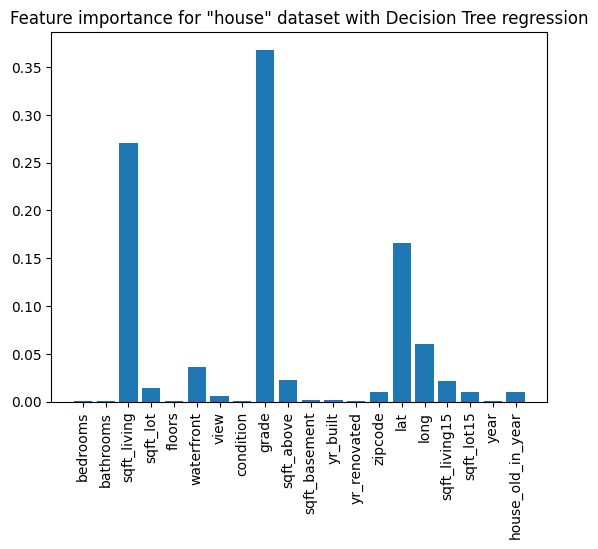

In [ ]:
# get importance
importance_tree = model_depth_10 .feature_importances_
# summarize feature importance
for i,v in enumerate(importance_tree):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(X_2.columns, importance_tree)
plt.xticks(rotation=90)
plt.title('Feature importance for "house" dataset with Decision Tree regression' )
plt.show()

##Summary

In summary we can state that Decision Tree Model (with level of depth =10) received better scores (Determination Score ~ 90%) than Linear Regression with regularization (~70%).  In both models latitude and longitude having significant importance in models. In Decision Tree model the most importance factors are sqft of living and grade while in Linear Regression also waterfront.